#  Communicate Data Findings
## by (Obichukwu Valentine Nzelu)

## Introduction

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The features captured included the trip start/end time, as well as other personal information of users (Customer or subscriber) such as user type, gender, birth year and bike id.
 

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load the data, and check its top 10 rows
df_ford = pd.read_csv("201902-fordgobike-tripdata.csv")
print(df_ford.shape)
df_ford.head(10)

(183412, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [3]:
df_ford.tail(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183402,122,2019-02-01 00:17:32.2580,2019-02-01 00:19:34.9380,119.0,18th St at Noe St,37.761047,-122.432642,120.0,Mission Dolores Park,37.761420,-122.426435,4326,Subscriber,NaN,NaN,No
183403,249,2019-02-01 00:15:12.0670,2019-02-01 00:19:21.6990,256.0,Hearst Ave at Euclid Ave,37.875112,-122.260553,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,4642,Subscriber,2000.0,Male,No
183404,256,2019-02-01 00:12:50.5540,2019-02-01 00:17:07.3620,241.0,Ashby BART Station,37.852477,-122.270213,248.0,Telegraph Ave at Ashby Ave,37.855956,-122.259795,4845,Subscriber,1980.0,Male,Yes
183405,111,2019-02-01 00:14:49.8740,2019-02-01 00:16:41.3010,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,19.0,Post St at Kearny St,37.788975,-122.403452,4832,Subscriber,1984.0,Male,No
183406,706,2019-02-01 00:04:40.6160,2019-02-01 00:16:27.0800,138.0,Jersey St at Church St,37.750900,-122.427411,78.0,Folsom St at 9th St,37.773717,-122.411647,5017,Subscriber,1988.0,Male,No
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [4]:
# check details about the columns
df_ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
# check descriptive statistics of df_ford
df_ford.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
# check descriptive statistics of df_ford
df_ford.shape

(183412, 16)

In [7]:
# check null values of df_ford
df_ford.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
# check null values of df_ford
df_ford.duplicated().sum()

0

In [9]:
# checking for unique values in user_type
df_ford.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

In [10]:
# checking for unique values in member_gender
df_ford.member_gender.unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

In [11]:
# checking for unique values in bike_share
df_ford.bike_share_for_all_trip.unique()
 

array(['No', 'Yes'], dtype=object)

### What is the structure of your dataset?

This dataset contains 183412 rows and 16 columns.
The features include:

* duration_sec 
* start_time 
* end_time 
* start_station_id 
* end_station_id 
* start_station_name rted
* end_station_name 
* start_station_latitude
* end_station_latitude
* start_station_longitude
* end_station_longitude
* bike_id
* user_type 
* member_gender
* member_birth_year
* bike_share_for_all_trip

### What is/are the main feature(s) of interest in your dataset?

* Determine the duration of various trips
* Determine the most popular periods(time of day, and day of the week) for bike trips.
* Discover the differences in bike usage between subscribers and customers.
* Does the average duration of bike trip depend on whether a user is a Subscriber or Customer and of Gender?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The following features of the data set that will aid my investigation include:

* duration_min
* start_date
* start_day
* start_hour
* member_gender
* bike_share_for_all_trip

## Cleaning the data 

In [12]:
#make a copy of the data before commencing cleaning process

ford_clean = df_ford.copy()
ford_clean

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


Delete values where start_station_id is null
Delete bike_share_for_all_trip column
Convert start_time & end_time to datetime
Extract weekday and hour of day information from start_time
Drop all rows where member_birth_year is null
Make a new coloumn age which is calculated from member_birth_year coloumn
Create a new column "duration_min" which is the duration of the trips in minutes

In [13]:
ford_clean[ford_clean['start_station_id'].isna()]
ford_clean.dropna(subset=['start_station_id'], inplace=True)

# check for null values
ford_clean.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8263
member_gender              8263
bike_share_for_all_trip       0
dtype: int64

In [14]:
ford_clean[ford_clean['member_gender'].isna()]
ford_clean.dropna(subset=['member_gender'], inplace=True)

# check for null values
ford_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [15]:
# convert column datatypes
ford_clean.start_station_id = ford_clean.start_station_id.astype(str)
ford_clean.end_station_id = ford_clean.end_station_id.astype(str)
ford_clean.bike_id = ford_clean.bike_id.astype(str)

ford_clean.start_time = pd.to_datetime(ford_clean.start_time)
ford_clean.end_time = pd.to_datetime(ford_clean.end_time)

ford_clean.user_type = ford_clean.user_type.astype('category')
ford_clean.member_gender = ford_clean.member_gender.astype('category')
ford_clean.bike_share_for_all_trip = ford_clean.bike_share_for_all_trip.astype('category')

ford_clean.member_birth_year = ford_clean.member_birth_year.astype(int)

# confirm changes
ford_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [16]:
print(ford_clean.shape)
ford_clean.head()

(174952, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No


In [17]:
# convert the trip duration from secs to minutes for better analysis

ford_clean['duration_min'] = ford_clean['duration_sec']/60
ford_clean

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,869.750000
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,26.416667
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,29.883333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996,Male,No,8.000000
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984,Male,No,5.216667
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990,Male,Yes,2.350000
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988,Male,No,2.316667


In [18]:
# split the start time column into date, time, day, and hour

ford_clean['date'] = ford_clean['start_time'].dt.date
ford_clean['time'] = ford_clean['start_time'].dt.time
ford_clean['day_date'] = ford_clean['start_time'].dt.day
ford_clean['day_name'] = ford_clean['start_time'].dt.day_name()
ford_clean['start_hour'] = ford_clean['start_time'].dt.hour

#create a new column for age from the year of birth
ford_clean['date'] = pd.to_datetime(ford_clean['date'])
ford_clean['age'] = ford_clean.date.dt.year - ford_clean.member_birth_year

In [19]:
#Define the Weekdays and Weekends
ford_clean['week_day_end'] = ford_clean['day_name'].apply(lambda x: 'Weekend' if x == 'Sunday' or x == 'Saturday' else 'Weekday')

In [20]:
# confirm changes
print(ford_clean.shape)
ford_clean.head(5)

(174952, 24)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,duration_min,date,time,day_date,day_name,start_hour,age,week_day_end
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Male,No,869.750000,2019-02-28,17:32:10.145000,28,Thursday,17,35,Weekday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Male,No,1030.900000,2019-02-28,12:13:13.218000,28,Thursday,12,47,Weekday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Other,No,608.166667,2019-02-28,17:54:26.010000,28,Thursday,17,30,Weekday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Male,Yes,26.416667,2019-02-28,23:54:18.549000,28,Thursday,23,45,Weekday
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Male,No,29.883333,2019-02-28,23:49:58.632000,28,Thursday,23,60,Weekday


In [21]:
ford_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [22]:
ford_clean.day_name.unique()

array(['Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Sunday', 'Saturday',
       'Friday'], dtype=object)

In [23]:
# change datatype of newly created columns
ford_clean.date = pd.to_datetime(ford_clean.date)
ford_clean.start_hour = ford_clean.start_hour.astype(int)

In [24]:
# convert start_day into ordered categorical type
weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday']
ordered_weekdays = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
ford_clean['day_name'] = ford_clean['day_name'].astype(ordered_weekdays)

In [25]:
# confirm changes
ford_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [26]:
# descriptive statistics for numeric variables
ford_clean.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,duration_min,day_date,start_hour,age
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,37.771220,-122.351760,37.771414,-122.351335,1984.803135,11.733379,15.312337,13.456165,34.196865
std,1642.204905,0.100391,0.117732,0.100295,0.117294,10.118731,27.370082,8.033926,4.734282,10.118731
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000,1.016667,1.000000,0.000000,18.000000
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,1980.000000,5.383333,8.000000,9.000000,27.000000
50%,510.000000,37.780760,-122.398279,37.781010,-122.397437,1987.000000,8.500000,15.000000,14.000000,32.000000
75%,789.000000,37.797320,-122.283093,37.797673,-122.286533,1992.000000,13.150000,22.000000,17.000000,39.000000
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000,1409.133333,28.000000,23.000000,141.000000


## Univariate Exploration


**We will examine the distribution of the main variable of interest: duration_sec, which was converted from seconds  to minutes (duration_min)**

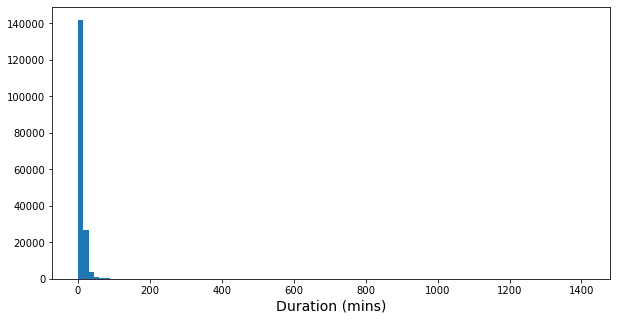

In [27]:
# start with a standard-scaled histogram plot
binsize = 15
bins = np.arange(0, ford_clean['duration_min'].max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = ford_clean, x = 'duration_min', bins = bins)
plt.xlabel('Duration (mins)', fontsize = 14)
plt.show()

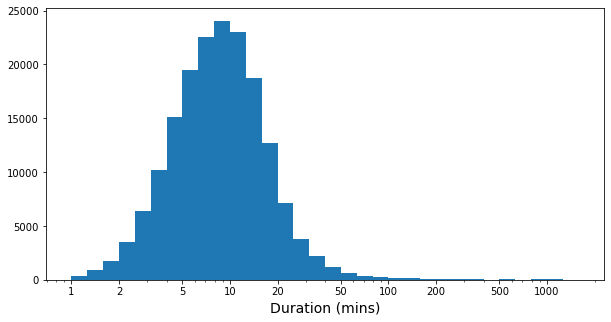

In [28]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.1
bins = 10 ** np.arange(0.0, np.log10(ford_clean['duration_min'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = ford_clean, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000], [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000])
plt.xlabel('Duration (mins)', fontsize = 14)
plt.show()

On the log scale, we see a unimodal normal distibution with a peak at around 10 minutes. Most durations fall between 7 and 12 minutes with very few rides exceeding the 60 minutes mark. 

**Distribution of the trips time in term of the day of month, day of week and hour of the day**

I will check the bike trips over the days of the month of february (1-28) days to view the distribution

Text(0, 0.5, 'Frequency')

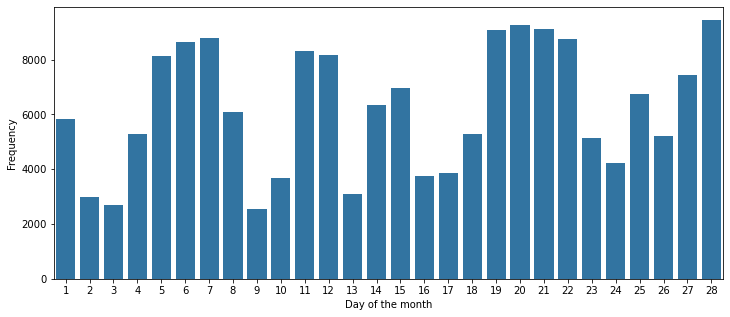

In [29]:
default_color = sb.color_palette()[0]
#distribution over the days of the month
plt.figure(figsize=[12,5])
sb.countplot(data=ford_clean,x='day_date',color=default_color)
plt.xlabel('Day of the month')
plt.ylabel('Frequency')

From the bar chart above, there seem to be four periods of high usage activity of bikes, from days 5 to 7, day 11 and day 12,then from day 19 to 22, and the last day of the month. The days with lower trips could be related if it is a weekend or a weekday. The day of the month doesn't seem to have any interesting observation, so I don't think It will be used in the next sections of the analysis.

**Next we look at the start_hour**

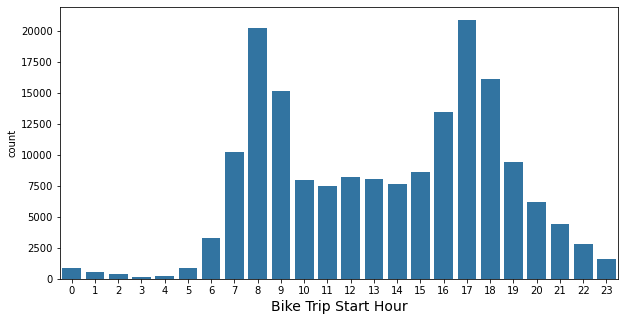

In [30]:
# make a count plot of start_hour
plt.figure(figsize=[10, 5])
default_color = sb.color_palette()[0]
sb.countplot(data = ford_clean, x = 'start_hour', color = default_color)
plt.xlabel('Bike Trip Start Hour', fontsize = 14)
plt.show();

The above distribution of hours of the day is bimodal, with two peaks at 8 am  and at 5 pm , which coincides with the time most work hours begin and end. The count of trips begin to decrease after 8am,between 9am and 3pm and experiences steady increase towards the close of work i.e between 3pm and 5pm. As we observe further, there are much more fewer trips between the late hours of the night and the early hours of the morning. The difference of distribtion over the day could be an indication of the purpose of the trips and the relation with the type of the users, so further investigation will be carried out to verify

**Next up, start_day**

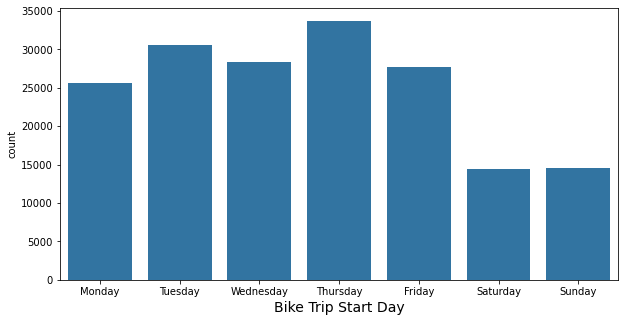

In [31]:
# make a count plot of start_day
plt.figure(figsize=[10, 5])
default_color = sb.color_palette()[0]
sb.countplot(data = ford_clean, x = 'day_name', color = default_color)
plt.xlabel('Bike Trip Start Day', fontsize = 14)
plt.show();

From the above plot, we can observe that there were higher number of bike trips on Weekdays; with Thursday having the highest number,  compared to Weekends.

The bar chart below clearly shows the difference between the number of trips on the weekdays and weekends.

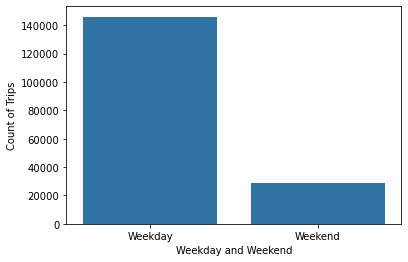

In [32]:
sb.countplot(data=ford_clean,x='week_day_end',color=default_color)
plt.xlabel('Weekday and Weekend');
plt.ylabel('Count of Trips');

**Next up, member_gender**

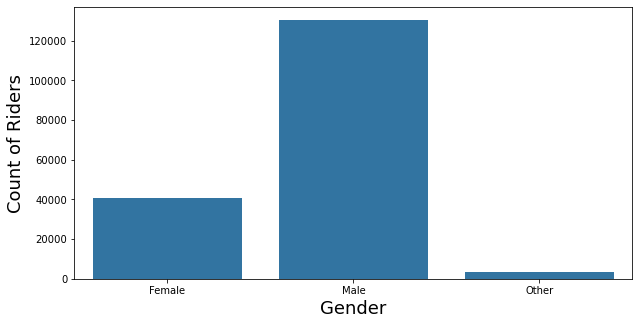

In [33]:
# make a count plot of member_gender
plt.figure(figsize=[10, 5])
default_color = sb.color_palette()[0]
sb.countplot(data = ford_clean, x = 'member_gender', color = default_color)
plt.xlabel('Gender', fontsize = 18)
plt.ylabel('Count of Riders', fontsize = 18)
plt.show();

From the above plot, male bike riders are about 3 times more than female bike riders, with Others being the least 

**Next we investigate the User Types**

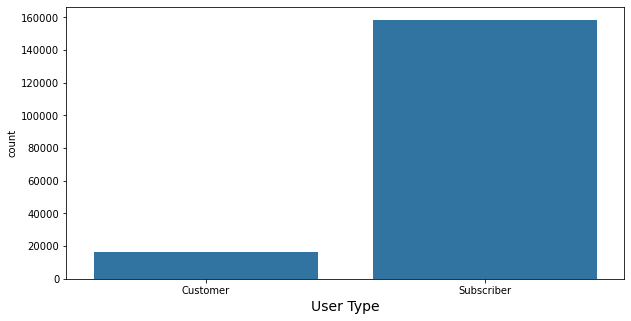

In [34]:
# make a count plot of user_type
plt.figure(figsize=[10, 5])
default_color = sb.color_palette()[0]
sb.countplot(data = ford_clean, x = 'user_type', color = default_color)
plt.xlabel('User Type', fontsize = 14)
plt.show();

From the above plot, subscribers are much more than customers. Let's have a look at the percentage difference.

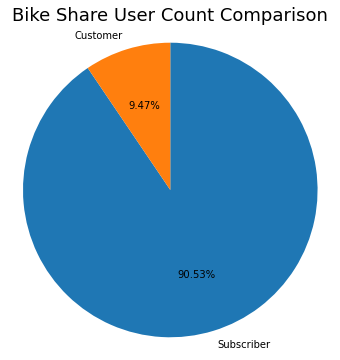

In [35]:
# Show user type by it's percentage

plt.figure(figsize=(10,6))
user_count = ford_clean['user_type'].value_counts()
plt.pie(user_count, labels = user_count.index, startangle = 90,
        counterclock = False, autopct='%1.2f%%');
plt.axis('square')
plt.title('Bike Share User Count Comparison', fontsize=18);

Subscriber accounts for about 90.5% of the total user type captured in this data set

**Investigating the bike_share_for_all_trip.**

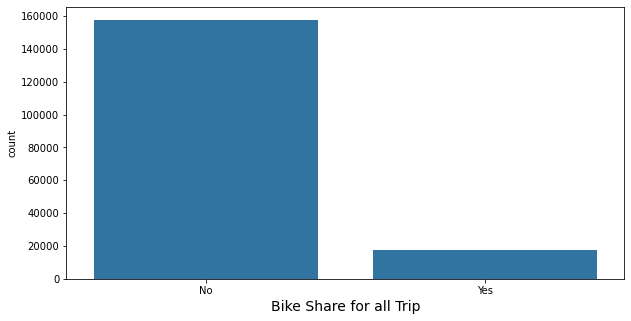

In [36]:
# make a count plot of bike_share_for_all_trip
plt.figure(figsize=[10, 5])
default_color = sb.color_palette()[0]
sb.countplot(data = ford_clean, x = 'bike_share_for_all_trip', color = default_color)
plt.xlabel('Bike Share for all Trip', fontsize = 14)
plt.show();

Majority of riders did not use bike share for all trips.

**Looking at the age distribution of riders**

<AxesSubplot:ylabel='age'>

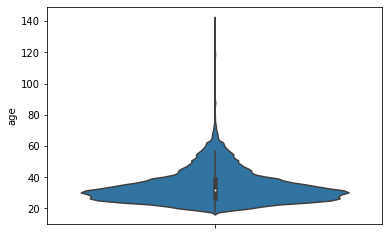

In [37]:
#First use a violin plot to check age distribution
sb.violinplot(data=ford_clean,y='age')

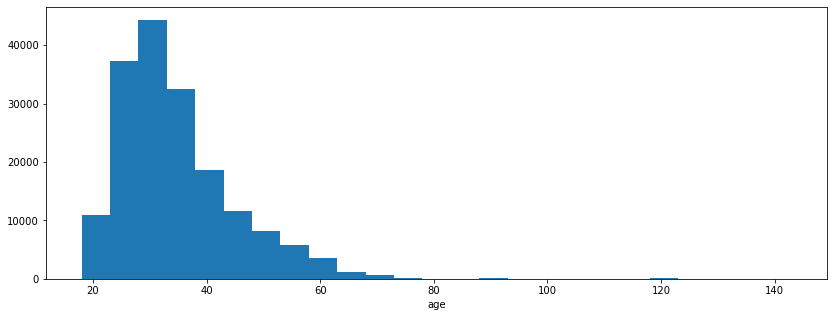

In [38]:
#then use a histogram
plt.figure(figsize=[14,5])
bins = np.arange(ford_clean.age.min(),ford_clean.age.max()+5,5)
plt.hist(data=ford_clean,x='age',bins=bins);
plt.xlabel('age');

The users of this bike sharing service fall mainly between 25 and 35 years of age.


In [39]:
ford_clean.start_station_name.nunique()

329

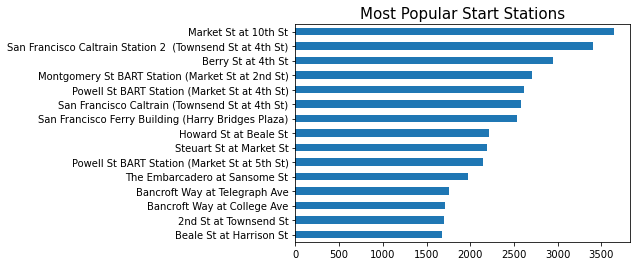

In [40]:
#Get the 15 most popular start stations used by Bike share users
plt.title('Most Popular Start Stations', fontsize=15)
ford_clean.start_station_name.value_counts(ascending=True).tail(15).plot.barh();

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

* The trips are more common in the weekdays than in the weekends. The hour of day distrbution shows two peaks at the start and end of the work day, i,e  at 8am and 5 pm respectively. The majority of the riders are male, and the most of the users are subscribers and don't use the bike share service for all their trips. The age of the most riders is between 25 and 35. The duration of trips had a wide range of values, so I transaformed the data for examination  with a log transform. The data was  unimodal after the transformation, with a peak between 7 and 12 minutes.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

* When exploring the start time variable, I needed to extract the date, time, day, and hour for easier and more visually revealing plots that give insight on the data set. I calculated the age of the riders from the year of birth as it is easier to understand, and I transformed the seconds into minutes as it is clearer to interpret.

## Bivariate Exploration


**Let's look at the pairwise correlation of some numeric variables**

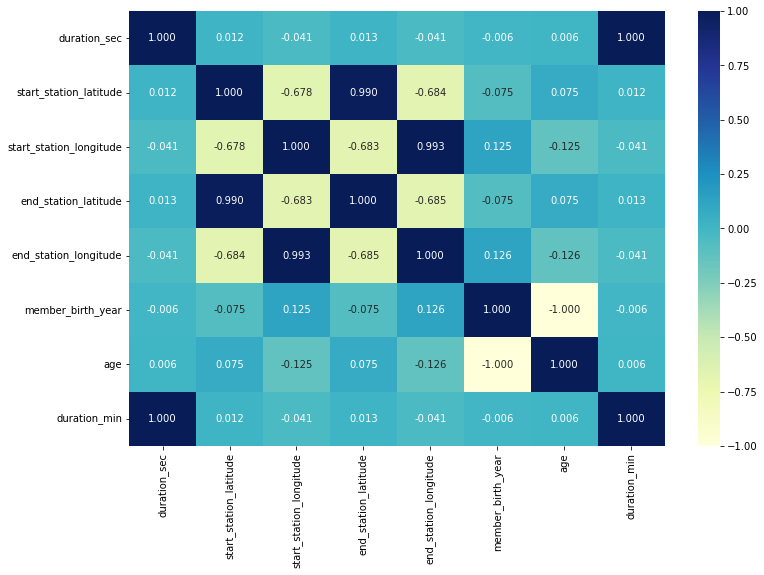

In [41]:
# correlation plot
num_var = ['duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude',
'end_station_longitude', 'bike_id', 'member_birth_year', 'age', 'duration_min']
plt.figure(figsize = [12, 8])
sb.heatmap(ford_clean[num_var].corr(), annot = True, fmt = '.3f', cmap = 'YlGnBu', center = 0)
plt.show()

From the correltion heat map, we see that several pair of variables exhibit a strong correlation, but we will focus on member_age, member_gender, user_type, duration_min, start_time, day of the week, and start_hour for analysis

**How does the trip duration vary with user type?**

In [42]:
def histplot(col_name):
    # log transformation
    log_binsize = 0.1
    bins = 10 ** np.arange(0.0, np.log10(ford_clean['duration_min'].max())+log_binsize, log_binsize)

    # Plot the Seaborn's FacetGrid
    g = sb.FacetGrid(data = ford_clean, col = col_name,  height=4, aspect = 1, sharey=False)
    g.map(plt.hist, "duration_min", bins = bins)
    plt.xscale('log')
    plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000], [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]);

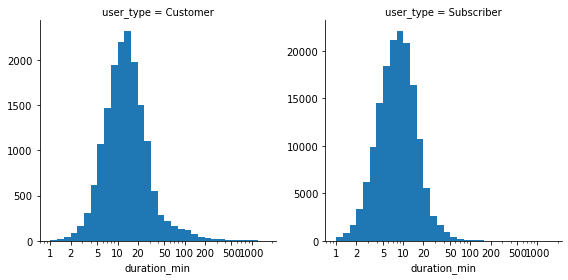

In [43]:
histplot('user_type')

From the above plot, it shows that most customers rode their bikes within 15 minutes whereas subscribers rode their bikes within 10 minutes. Customers were also more likely to ride longer than one hour when compared to subscriber users.

**How does the trip duration vary with gender?**

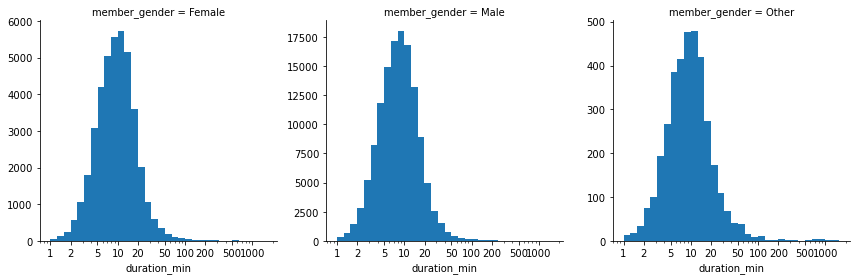

In [44]:
histplot('member_gender')

From the above plot, most female rides were between 7 - 15 minutes, while the male riders spend between 8 - 10 minutes on their bikes. This shows that female bikers ride for a longer duration compared to male bikers.

**What days of the week have the longest trip duration?**

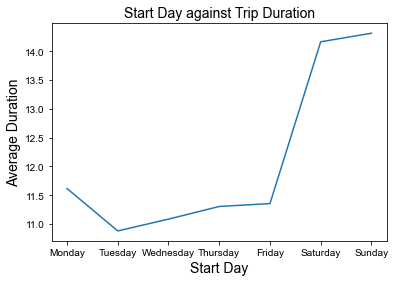

In [45]:
# group the start_day and find the average duration_min
longest_rides = ford_clean.groupby('day_name')['duration_min'].mean()

# make a plot of the start_day and the Average duration_min
longest_rides.plot()

# set the figure size and style
sb.set(rc={'figure.figsize':(10,5)})
sb.set_style("whitegrid")

# setup the axis and title label
plt.title("Start Day against Trip Duration", fontsize = 14)
plt.xlabel("Start Day", fontsize = 14)
plt.ylabel("Average Duration", fontsize = 14)
plt.show()

From the plot, we can clearly observe that weekend rides (Saturday and Sunday) last longer on average than other days.

**Checking customers' and subscribers' daily usage**

In [46]:
def usage_plot(col_name):
    plt.figure(figsize=[10, 5])
    sb.countplot(data = ford_clean, x = col_name, hue = 'user_type')
    plt.xlabel(col_name, fontsize = 14)
    plt.show();

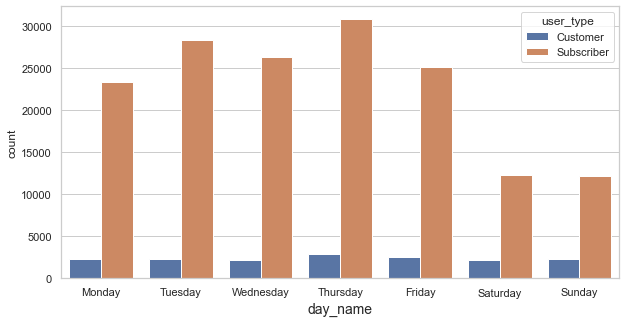

In [47]:
usage_plot('day_name')

* The number of subscribers far exceeds that of customers when checking  daily usage of the Bike shared service. 
* The drop in volume for subscribers on weekends indicates that most bike rides during the week are primarily for commuting to and from work

**Customers' and subscribers' hourly usage**

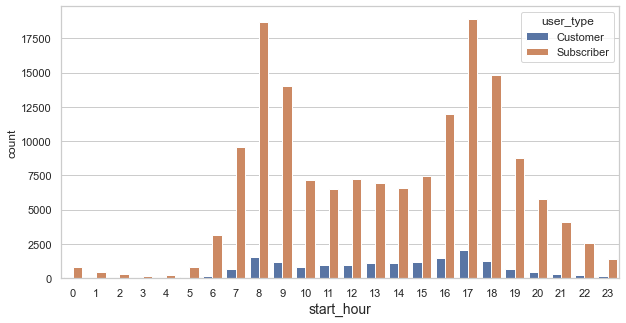

In [48]:
usage_plot('start_hour')

Subscriber usage peaks during typical rush hours when people are leaving for work in the morning and returning home in the afternoon, confirming their usage purpose and goal of riding. A similar pattern was not observed among customers who ride most frequently in the afternoon or early evening for a different reason than subscriber riders.

**Daily usage by gender**

In [49]:
def gender_plot(col_name):
    plt.figure(figsize=[10, 5])
    sb.countplot(data = ford_clean, x = col_name, hue = 'member_gender')
    plt.xlabel(col_name, fontsize = 14)
    plt.show();

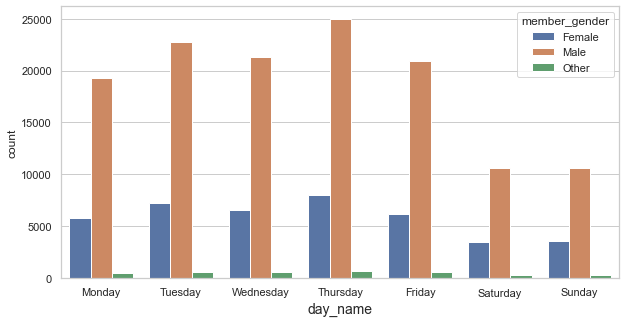

In [50]:
gender_plot('day_name')

We can observe see that there is a similarity in the daily usage of both male and female bikers; they both have the highest number of bikers on Thursday.

**Hourly usage of bikes by gender**

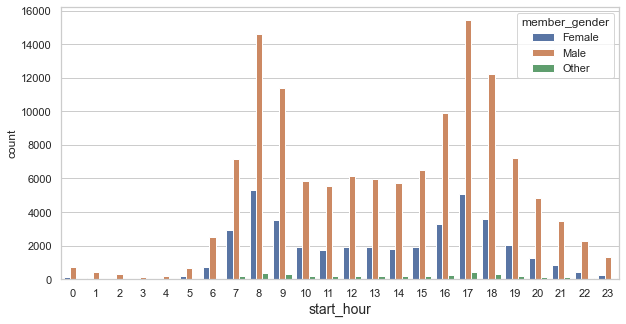

In [51]:
gender_plot('start_hour')

On an hourly basis, the majority of male rides take place at 5 p.m., while the majority of female rides take place at 8 a.m.

**User Type vs Member Gender**

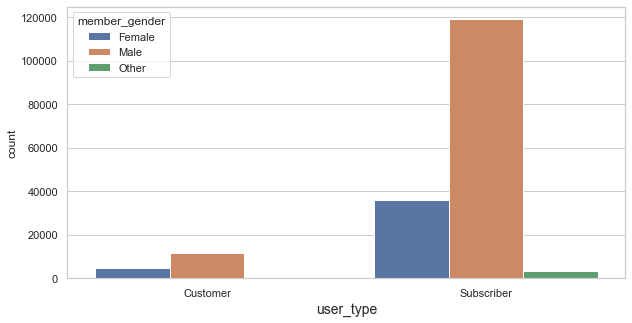

In [52]:
gender_plot('user_type')

The majority of customer bikers are male, and the majority of subscriber bikers are also male

**Gender vs Age**

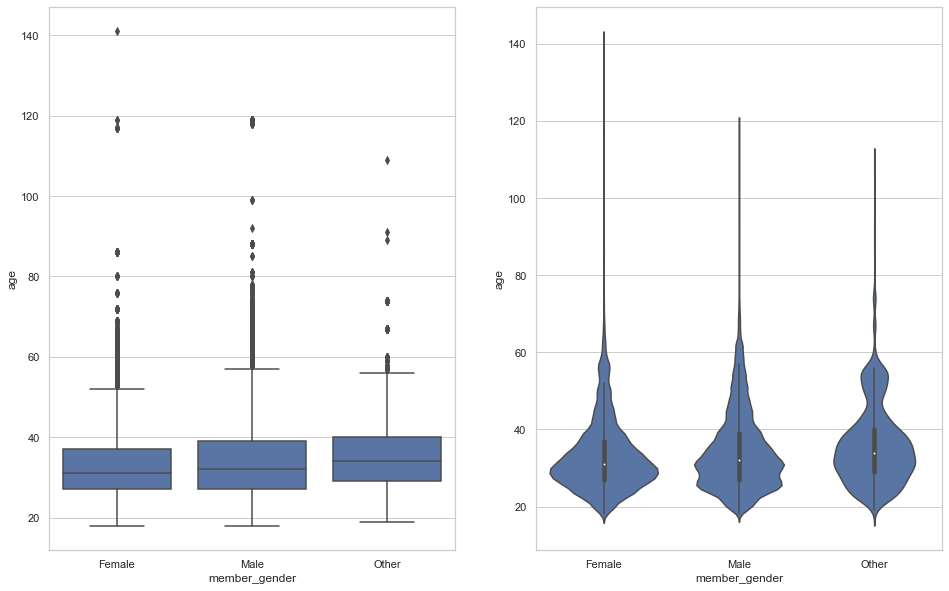

In [53]:
default_color = sb.color_palette()[0]
plt.figure(figsize=[16,10])
plt.subplot(1,2,1)
sb.boxplot(data=ford_clean,x='member_gender',y='age',color=default_color);
plt.subplot(1,2,2)
sb.violinplot(data=ford_clean,x='member_gender',y='age',color=default_color);

Discounting the presence of the outliers by the box plot, the max age of male users are greather than the female users. The female age distribution is concentrated around 25-30 years, while the  male distribution is narrower around these values (falls between 25 and 39 years)  with 57 years being the maximum value. This can be the reason why the female users use the bikes for longer time.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

* The main variable of interest is duration. Customers ride bikes within 15 minutes while subscribers ride bikes within 10 minutes. Customers were also seen to ride bikes longer than 1 hour when compared to subscribers.
* Female riders lasted longer on average (10-15 min) compared to male riders (8-10 min).
* The duration of the trips is longer among the young users than among old users. This also can be the reason why the duration of the trips is longer for the female riders since the female users are younger than the males users. 
* Weekend rides lasted longer than other days.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

* Subscribers ride bikes far more than customers and subscribers primarily ride bikes for work.
* Both customer and subscriber riders have more males than females.
* The majority of male rides take place at 5 p.m., while the majority of female rides take place at 8 a.m.
* It is interesting to see that customers have longer trips in average than the subscribers while the median age is the same, and particularly since we saw that the duration depends on the age.

## Multivariate Exploration

In this section of the analysis, I'd like to look at how the user type, member gender, start day, and start hour affect the relationship with duration (our main variable of interest).

**What is the relationship between member_gender, duration_min and user_type?**

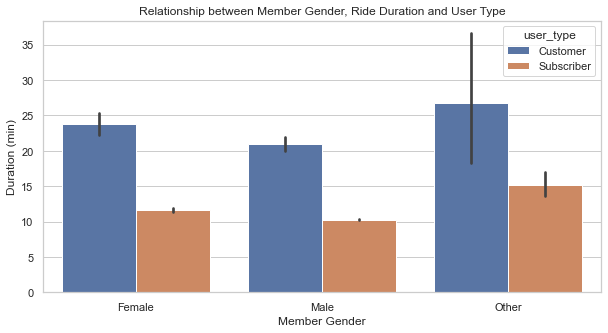

In [54]:
sb.barplot(data = ford_clean, x = 'member_gender', y = 'duration_min', hue = 'user_type');
plt.title('Relationship between Member Gender, Ride Duration and User Type');
plt.xlabel('Member Gender');
plt.ylabel('Duration (min)');

We can observe that customers who are of the other gender have more ride durations than customers who are of male and female gender. The same is also applicable for the subscribers.

**Relationship between the variables duration_min, start_hour and user_type.**

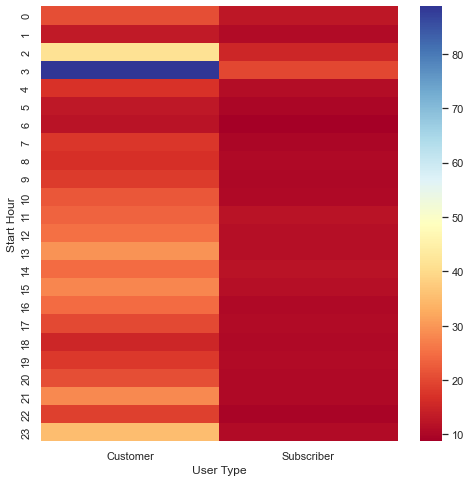

In [55]:
heatmap_data = pd.pivot_table(ford_clean, values='duration_min', 
                     index=['start_hour'], 
                     columns='user_type')
plt.figure(figsize = [8, 8])
sb.heatmap(heatmap_data, cmap="RdYlBu")
plt.xlabel('User Type')
plt.ylabel('Start Hour');

Subscribers' trip durations are almost even spread throughout the day. Customers' trips last longer at 3:00am, 2:00am and 11:00pm

**How does the average trip duration differ between customers and subscribers in terms of days?**

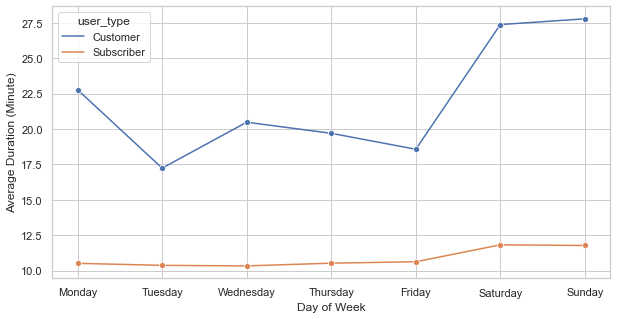

In [56]:
# group by user_type and start_day and find the average duration_min
avg_duration_user_days = ford_clean.groupby(['user_type','day_name'])['duration_min'].mean()
avg_duration_user_days = avg_duration_user_days.reset_index()

# make a line plot
sb.lineplot(data=avg_duration_user_days, x='day_name', y='duration_min', hue='user_type', marker='o');
plt.xlabel('Day of Week');
plt.ylabel('Average Duration (Minute)');


The above plot shows that subscribers ride much shorter trips than customers on each day of the week. Both user types have an increase in trip duration over weekends. Subscribers appear to be more efficient than customers overall, with a very consistent average duration from Monday to Friday.

**How does the average trip duration differ between customers and subscribers in terms of hours?**

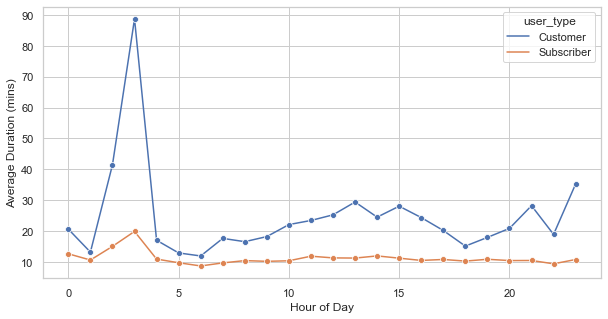

In [57]:
# group by user_type and start_hour and find the average duration_min
avg_duration_user_hours = ford_clean.groupby(['user_type','start_hour'])['duration_min'].mean()
avg_duration_user_hours = avg_duration_user_hours.reset_index()

# make a line plot
sb.lineplot(data=avg_duration_user_hours, x='start_hour', y='duration_min', hue='user_type', marker='o');
plt.xlabel('Hour of Day');
plt.ylabel('Average Duration (mins)');

Both customers and subscribers are seen to have the longest rides between 2-3 hours. Subscribers have a more consistent average duration than customers.

**How does the average trip duration differ between gender in terms of days?**

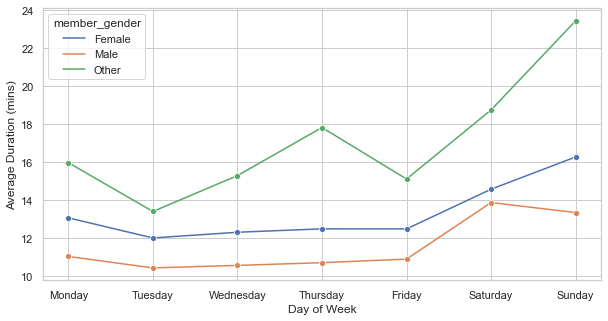

In [58]:
# group by member_gender and start_day and find the average duration_min
avg_duration_gender_days = ford_clean.groupby(['member_gender','day_name'])['duration_min'].mean()
avg_duration_gender_days = avg_duration_gender_days.reset_index()

# make a line plot
sb.lineplot(data=avg_duration_gender_days, x='day_name', y='duration_min', hue='member_gender', marker='o');
plt.xlabel('Day of Week');
plt.ylabel('Average Duration (mins)');

Male riders are seen to have a shorter duration than female rides all through the week. The other gender is seen to have an extremely long duration of ride over the weekend.

**How does the average trip duration differ between gender and user in terms of days?**

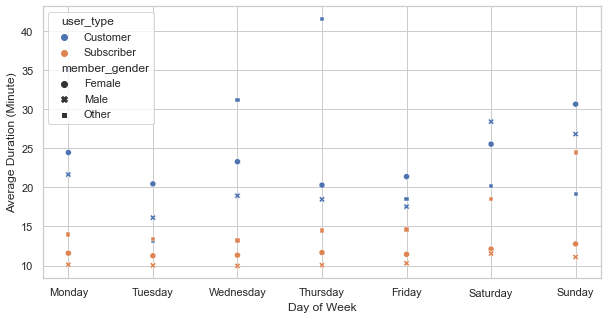

In [59]:
# group by member_gender, user_type and start_day and find the average duration_min
avg_gender_user_days = ford_clean.groupby(['member_gender','user_type','day_name'])['duration_min'].mean()
avg_gender_user_days = avg_gender_user_days.reset_index()

# make a scatter plot
sb.scatterplot(data=avg_gender_user_days, x='day_name', y='duration_min', style='member_gender', hue = 'user_type');
plt.xlabel('Day of Week');
plt.ylabel('Average Duration (Minute)');

Male subscribers have the shortest average duration of bike trips across the week days, while female customer bikers have the longest average duration of bike trips across the week days.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

* The multivariate exploration reinforced some of the patterns discovered in the previous bivariate and univariate explorations, and the relationship between the multiple variables plotted is visualized and information is presented together. * Subscribers' efficient/short usage period corresponds to their high concentration on rush hours Monday through Friday, indicating that the use is primarily for work commute. 
* Generally, Female subscribers/customers have longer trip durations
* Customers who are of the other gender has more ride durations than customers who are of male and female gender
* Bike trips taken during the weekend were the longest.

### Were there any interesting or surprising interactions between features?

* The interactions between features all complement each other and make sense when viewed together 
* The analysis of the dataset tells us that most rides occurs during morning and evening sessions, this could mean that users of the bike-sharing scheme in San Francisco Bay are workers

## Conclusions

* The analysis of the dataset tells us that most rides occurs during morning and evening sessions, this could mean that users of the bike-sharing scheme in San Francisco Bay are workers
* There are less female gender participating in the bike-sharing program, so the owners of the program can emply the use of targeted marketing ads to the female and other non gender specific groups
* The bike sharing service is used mainly by young people within the ages of 25 and 35, which will serve as a guide for targeted marketing based on specific age grades


In [62]:
ford_clean.shape

(174952, 24)

In [60]:
# save ford_clean to a csv file
ford_clean.to_csv('Ford_GoBike_clean.csv', index=False)